In [1]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.read_csv('volatility_adjusted_mean_reversion.csv')
# print(results.head(1))


In [2]:
num_days = len(results.index)
pnl = results['Pnl']

weekly_losses = []
monthly_losses = []

for i in range(0, num_days):
    if i >= 5 and pnl[i - 5] > pnl[i]:
        weekly_losses.append(pnl[i] - pnl[i - 5])
    
    if i >= 20 and pnl[i - 20] > pnl[i]:
        monthly_losses.append(pnl[i] - pnl[i - 20])


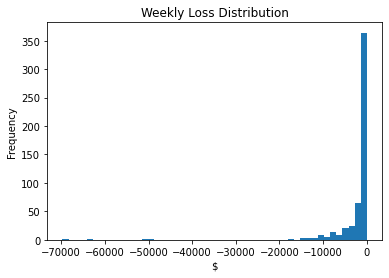

In [3]:
plt.hist(weekly_losses, 50)
plt.gca().set(title='Weekly Loss Distribution', xlabel='$', ylabel='Frequency')
plt.show()

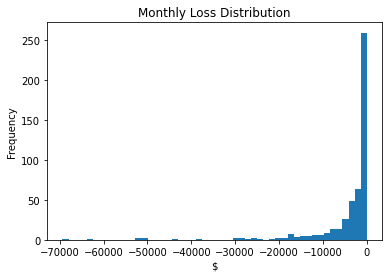

In [4]:
plt.hist(monthly_losses, 50)
plt.gca().set(title='Monthly Loss Distribution', xlabel='$', ylabel='Frequency')
plt.show()


Max Drawdown:  71378.67290790257


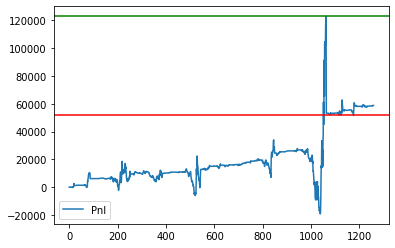

In [5]:
max_pnl = 0
max_drawdown = 0
drawdown_max_pnl = 0
drawdown_min_pnl = 0

for i in range(0, num_days):
    max_pnl = max(max_pnl, pnl[i])
    drawdown = max_pnl - pnl[i]

    if drawdown > max_drawdown:
        max_drawdown = drawdown
        drawdown_max_pnl = max_pnl
        drawdown_min_pnl = pnl[i]

print('Max Drawdown: ', max_drawdown)

results['Pnl'].plot(x='Date', legend=True)
plt.axhline(y=drawdown_max_pnl, color='g')
plt.axhline(y=drawdown_min_pnl, color='r')
plt.show()


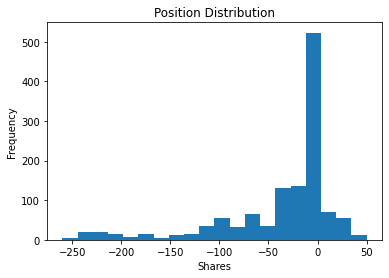

In [6]:
position = results['Position']
plt.hist(position, 20)
plt.gca().set(title='Position Distribution', xlabel='Shares', ylabel='Frequency')
plt.show()


[15, 6, 36, 4, 6, 115, 22, 45, 61, 3, 3, 12, 15, 16, 68, 6, 18, 4, 4, 2, 19, 27, 3, 6, 13, 2, 2, 2, 7, 6, 2, 2, 12, 2, 57, 18, 8, 2, 2, 2, 16, 2, 106, 10, 3, 2, 3, 27, 2, 6, 2, 2, 15, 3, 3, 4, 5, 13, 4, 2, 2]


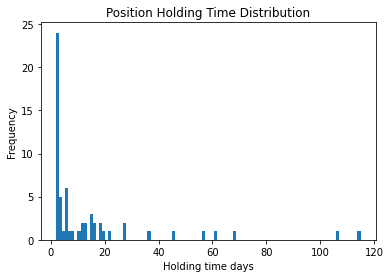

In [7]:
position_holding_times = []
current_pos = 0
current_pos_start = 0

for i in range(0, num_days):
    pos = results['Position'].iloc[i]

    if current_pos  == 0:
        if pos != 0:
            current_pos = pos
            current_pos_start = i
        continue

    if current_pos * pos <= 0:
        current_pos = pos
        position_holding_times.append(i - current_pos_start)
        current_pos_start = i

print(position_holding_times)
plt.hist(position_holding_times, 100)
plt.gca().set(title='Position Holding Time Distribution', xlabel='Holding time days', ylabel='Frequency')
plt.show()

Weekly PnL Standard Deviation:  6600.352782839977


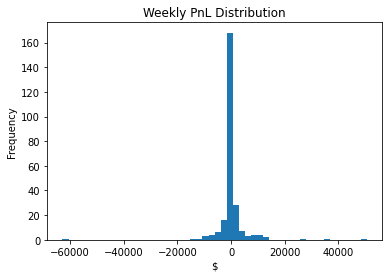

In [8]:
last_week = 0
weekly_pnls = []

for i in range(0, num_days):
    if i - last_week >= 5:
        weekly_pnls.append(pnl[i] - pnl[last_week])
        last_week = i

from statistics import stdev
print('Weekly PnL Standard Deviation: ', stdev(weekly_pnls))

plt.hist(weekly_pnls, 50)
plt.gca().set(title='Weekly PnL Distribution', xlabel='$', ylabel='Frequency')
plt.show()

In [9]:
last_week = 0
weekly_pnls = []
weekly_losses = []

for i in range(0, num_days):
    if i - last_week >= 5:
        pnl_change = pnl[i] - pnl[last_week]
        weekly_pnls.append(pnl_change)
        if pnl_change < 0:
            weekly_losses.append(pnl_change)
        last_week = i

from statistics import stdev, mean

sharp_ratio = mean(weekly_pnls) / stdev(weekly_pnls)
sortino_ratio = mean(weekly_pnls) / stdev(weekly_losses)

print('Sharp ratio: ', sharp_ratio)
print('Sortino ratio: ', sortino_ratio)

Sharp ratio:  0.03546041017920641
Sortino ratio:  0.03656199995594408


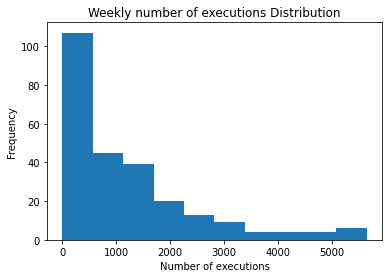

In [10]:
execution_this_week = 0
execution_per_week = []
last_week = 0

for i in range(0, num_days):
    if results['Trades'].iloc[i] != 0:
        execution_this_week += i

    if i - last_week >= 5:
        execution_per_week.append(execution_this_week)
        execution_this_week = 0
        last_week = i

plt.hist(execution_per_week, 10)
plt.gca().set(title='Weekly number of executions Distribution', xlabel='Number of executions', ylabel='Frequency')
plt.show()

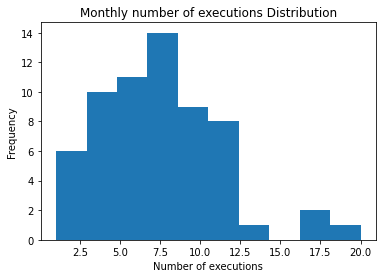

In [11]:
executions_this_month = 0
executions_per_month = []
last_month = 0

for i in range(0, num_days):
    if results['Trades'].iloc[i] != 0:
        executions_this_month += 1

    if i - last_month >= 20:
        executions_per_month.append(executions_this_month)
        executions_this_month = 0
        last_month = i

plt.hist(executions_per_month, 10)
plt.gca().set(title='Monthly number of executions Distribution',
              xlabel='Number of executions', ylabel='Frequency')
plt.show()


In [13]:
traded_volume = 0

for i in range(0, num_days):
    if results['Trades'].iloc[i] != 0:
        traded_volume += abs(results['Position'].iloc[i] - results['Position'].iloc[i - 1])

print('Total traded volume: ', traded_volume)

Total traded volume:  4560
